# Hamiltonian integrator

### Hamiltonian System

Hamiltonian dynamics evolve according to Hamilton's equations, with respec to the Hamiltonian function $H(q,p)$ (derived from the Lagrangian and the stationary action principle):
$$
\begin{align}
\frac{dq}{dt} &= \frac{\partial H}{\partial p} \\
\frac{dp}{dt} &= -\frac{\partial H}{\partial q}
\end{align}
$$
Where $q$ is the generalized position and $p$ is the generalized momentum.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def leapfrog_history(q0, p0, dt, num_steps, q_dot, p_dot):
    '''leapfrog integrator for separable Hamiltonian systems H(q,p) = A(p) + B(q)'''
    
    dim = q0.shape[0]
    
    q_history = np.zeros((num_steps, dim))  # Include initial state
    p_history = np.zeros((num_steps, dim))
    
    q = q0.copy()
    p = p0.copy()
    
    for i in range(num_steps):
        p_half = p + p_dot(q) * dt / 2
        q_new = q + q_dot(p_half) * dt
        p_new = p_half + p_dot(q_new) * dt / 2
        
        q = q_new
        p = p_new

        q_history[i] = q
        p_history[i] = p
    
    return q_history, p_history

def euler_history(q0, p0, dt, num_steps, q_dot, p_dot):
    dim = q0.shape[0]
    
    q_history = np.zeros((num_steps, dim))
    p_history = np.zeros((num_steps, dim))

    q = q0.copy()
    p = p0.copy()
    
    for i in range(num_steps):
        p_new = p + p_dot(q) * dt
        q_new = q + q_dot(p) * dt
        
        q = q_new
        p = p_new

        q_history[i] = q
        p_history[i] = p

    return q_history, p_history

## Bead on a hoop example

Let us take a *bead on a hoop* problem (with $m=R=g=1$). 



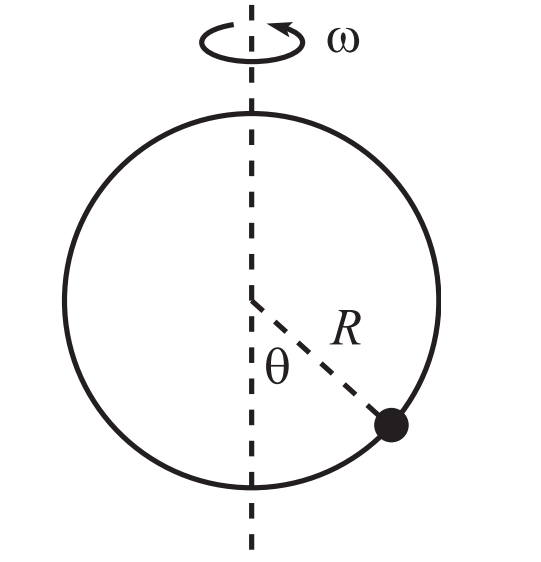

The Hamiltonian is given by ([link](https://www.ipcms.fr/uploads/2021/06/chap15.pdf) question 15.11):
$$
\begin{align}

H &= \frac{p^{2}}{2mR^{2}} - \frac{1}{2} mR^{2} \omega^{2} \sin^{2}\theta - mgR \cos\theta \\
&= \frac{p^{2}}{2} - \frac{1}{2} \sin^{2}\theta - \cos\theta
\end{align}
$$
This gives us our equations of motion:
$$
\begin{align}
\frac{d\theta}{dt} &= \frac{\partial H}{\partial p} = p\\
\frac{dp}{dt} &= -\frac{\partial H}{\partial \theta} = \omega^2\sin\theta \cos\theta - \sin\theta
\end{align}
$$


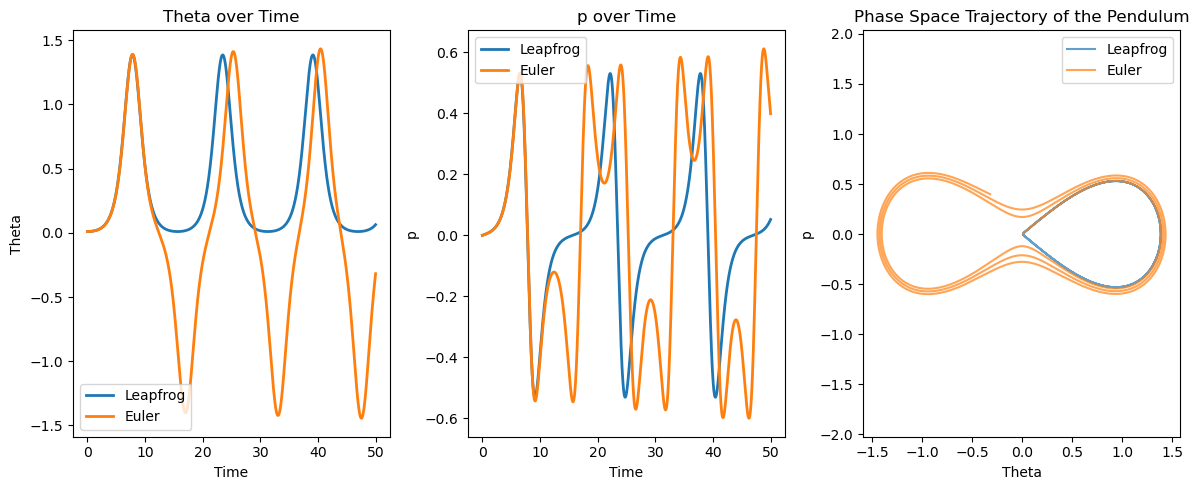

In [8]:
def theta_dot(p):
    return p

def p_dot(theta, omega=1.3):
    return omega**2 * np.sin(theta) * np.cos(theta) - np.sin(theta)

dt = 0.01
max_steps = 5000

thetas_lf, ps_lf = leapfrog_history(np.array([0.01]), np.array([0.0]), dt, max_steps, theta_dot, p_dot)
thetas_eu, ps_eu = euler_history(np.array([0.01]), np.array([0.0]), dt, max_steps, theta_dot, p_dot)

# plot theta and p over time
time = np.arange(max_steps) * dt
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)

plt.plot(time, thetas_lf, label='Leapfrog', linewidth=2)
plt.plot(time, thetas_eu, label='Euler', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Theta')
plt.title('Theta over Time')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(time, ps_lf, label='Leapfrog', linewidth=2)
plt.plot(time, ps_eu, label='Euler', linewidth=2)
plt.xlabel('Time')
plt.ylabel('p')
plt.title('p over Time')
plt.legend()

# plot phase space
plt.subplot(1, 3, 3)
plt.plot(thetas_lf, ps_lf, label='Leapfrog', alpha=0.7)
plt.plot(thetas_eu, ps_eu, label='Euler', alpha=0.7)
plt.xlabel('Theta')
plt.ylabel('p')
plt.title('Phase Space Trajectory of the Pendulum')
plt.axis('equal')
plt.legend()
plt.tight_layout()